<a href="https://colab.research.google.com/github/ajmateti/ML-Projects/blob/master/cifar10_basic_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
 x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

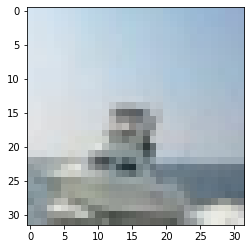

In [0]:
plt.imshow(x_train[100])

In [0]:
y_train[0]

array([6], dtype=uint8)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
from tensorflow.keras.utils import to_categorical
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")



In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",patience=2)

In [0]:
x_train.shape, y_cat_train.shape

((50000, 32, 32, 3), (50000, 10))

In [0]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=100,callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5998 - accuracy: 0.4135 - val_loss: 1.3780 - val_accuracy: 0.5044
Epoch 2/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2942 - accuracy: 0.5373 - val_loss: 1.1878 - val_accuracy: 0.5743
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1742 - accuracy: 0.5848 - val_loss: 1.1121 - val_accuracy: 0.6036
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0901 - accuracy: 0.6156 - val_loss: 1.0369 - val_accuracy: 0.6363
Epoch 5/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0107 - accuracy: 0.6472 - val_loss: 1.0315 - val_accuracy: 0.6403
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9592 - accuracy: 0.6640 - val_loss: 1.0131 - val_accuracy: 0.6448
Epoch 7/100
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9131 - accuracy: 0.6778 - val_loss: 0.9975 - val_ac

In [0]:
metrics = pd.DataFrame(model.history.history)

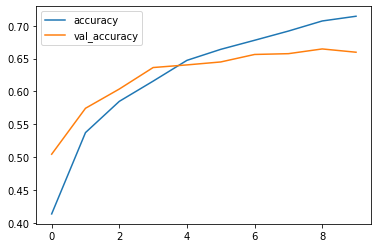

In [0]:
metrics[['accuracy','val_accuracy']].plot()